In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
dataset = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

In [160]:
dataset.head()
pd.set_option('display.max_columns', None)

In [161]:
dataset.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


# EDA

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
dataset.shape

(2000, 21)

In [13]:
dataset.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# Data Visualization

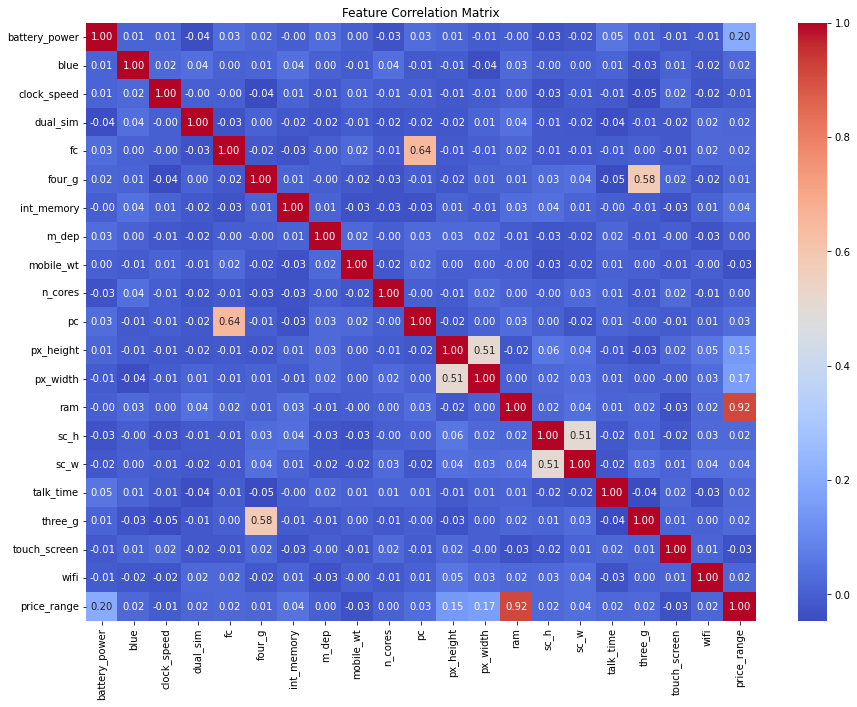

In [22]:
corr = dataset.corr()

plt.figure(figsize=(15, 11))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Feature Correlation Matrix')

plt.show()

In [79]:
dataset['ram'].min()

256

In [80]:
dataset['ram'].max()

3998

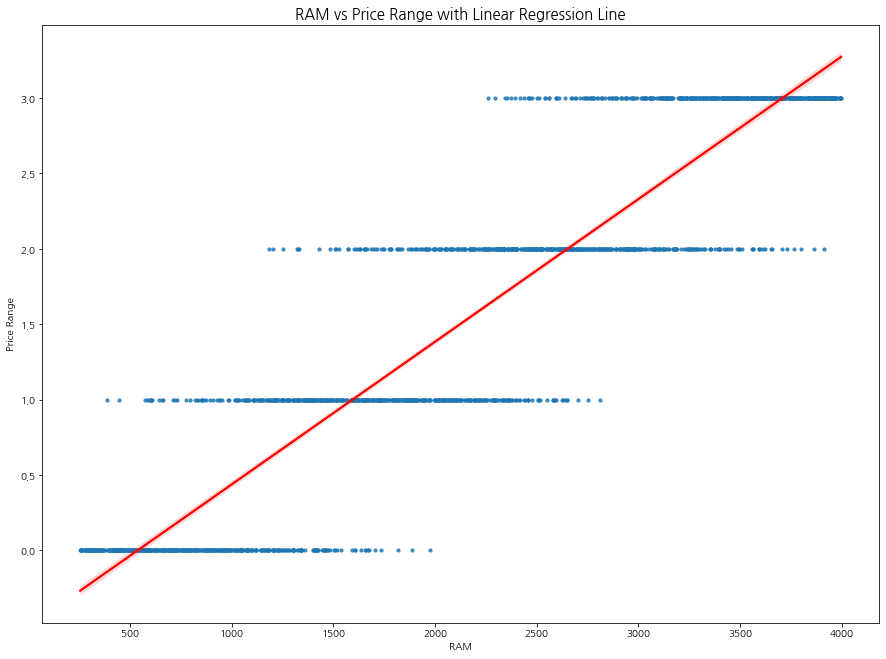

In [61]:
plt.figure(figsize=(15, 11))
sns.regplot(x='ram', y='price_range', data=dataset, scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('RAM vs Price Range with Linear Regression Line', fontsize=15)
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.show()

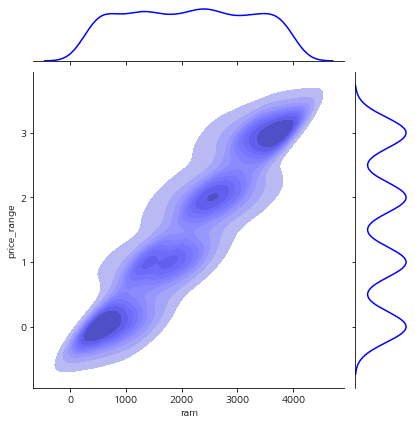

In [59]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='b',kind='kde', shade=True)

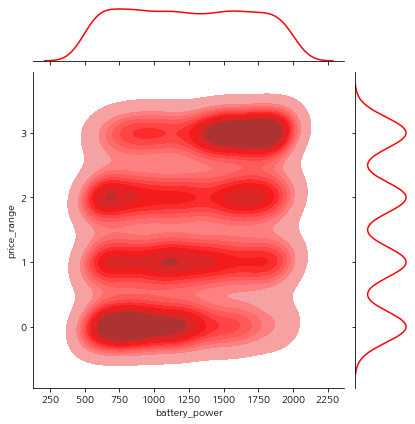

In [60]:
sns.jointplot(x='battery_power',y='price_range',data=dataset,color='red',kind='kde', shade=True)

In [155]:
feature_list = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

def count_value(feature_name):
    feature_0_count = (dataset[feature_name] == 0).sum()
    feature_1_count = (dataset[feature_name] == 1).sum()
    return feature_0_count, feature_1_count

fig = make_subplots(rows=2, cols=3, specs=[[{'type': 'pie'}] * 3] * 2, subplot_titles=feature_list)

for i, feature_name in enumerate(feature_list):
    feature_0_count, feature_1_count = count_value(feature_name)
    labels = [f'{feature_name} 없음', f'{feature_name} 있음']
    values = [feature_0_count, feature_1_count]
    
    fig.add_trace(go.Pie(labels=labels, values=values, name=feature_name, marker_colors=colors), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(title_text="기능별 지원 여부", height=600, width=800)
fig.show()

In [98]:
# sc_area 추가

dataset['sc_area'] = dataset['sc_h'] * dataset['sc_w']

In [99]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,52
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,110
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,9
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,180


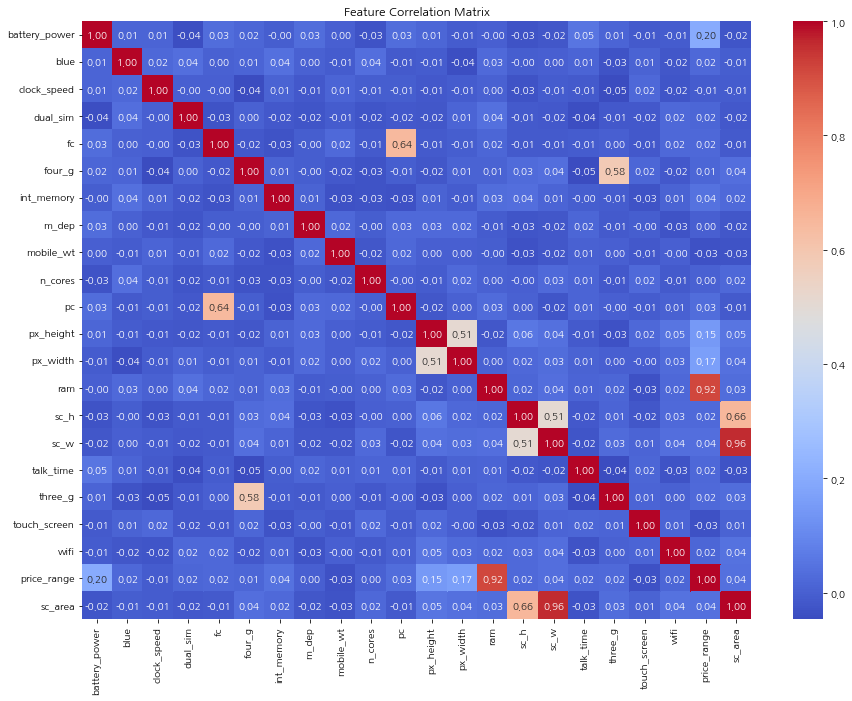

In [100]:
# sc_area의 영향력을 알아보기 위한 히트맵
corr = dataset.corr()

plt.figure(figsize=(15, 11))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Feature Correlation Matrix')

plt.show()

In [102]:
dataset.drop('sc_area', axis=1, inplace=True)

(array([223., 199., 210., 199., 190., 185., 193., 201., 197., 203.]),
 array([ 501. ,  650.7,  800.4,  950.1, 1099.8, 1249.5, 1399.2, 1548.9,
        1698.6, 1848.3, 1998. ]),
 <BarContainer object of 10 artists>)

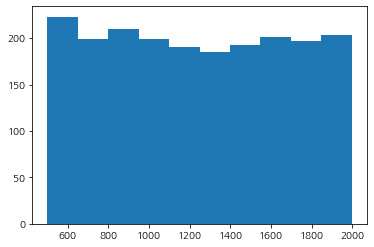

In [103]:
plt.hist(dataset['battery_power'])

(array([551., 116., 168., 138., 203., 127., 202., 136., 184., 175.]),
 array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <BarContainer object of 10 artists>)

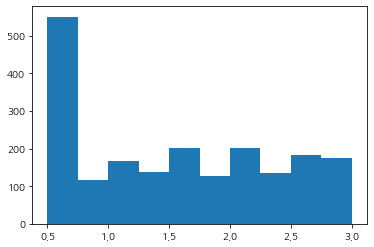

In [104]:
plt.hist(dataset['clock_speed'])

(array([719., 359., 272., 212., 155., 113.,  85.,  43.,  30.,  12.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

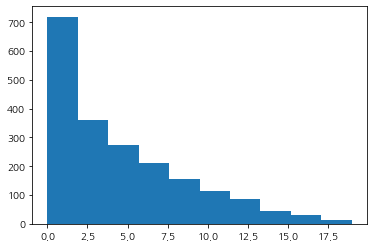

In [105]:
plt.hist(dataset['fc'])

(array([237., 217., 197., 179., 196., 205., 203., 183., 193., 190.]),
 array([ 2. ,  8.2, 14.4, 20.6, 26.8, 33. , 39.2, 45.4, 51.6, 57.8, 64. ]),
 <BarContainer object of 10 artists>)

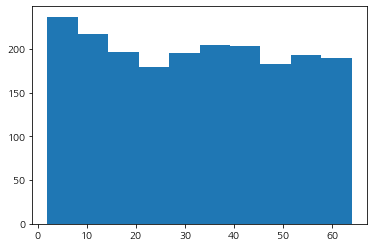

In [106]:
plt.hist(dataset['int_memory'])

(array([209., 192., 214., 171., 201., 196., 208., 183., 203., 223.]),
 array([ 80.,  92., 104., 116., 128., 140., 152., 164., 176., 188., 200.]),
 <BarContainer object of 10 artists>)

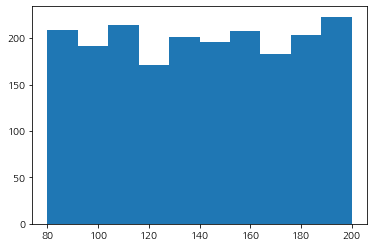

In [107]:
plt.hist(dataset['mobile_wt'])

(array([242., 247., 246.,   0., 274., 246.,   0., 230., 259., 256.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

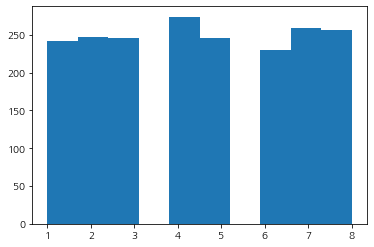

In [108]:
plt.hist(dataset['n_cores'])

(array([205., 192., 154., 214., 201., 201., 175., 196., 187., 275.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

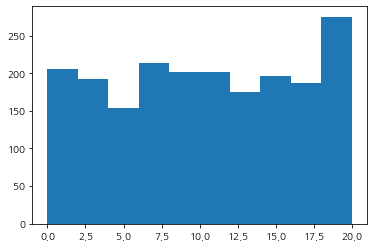

In [109]:
plt.hist(dataset['pc'])

(array([215., 183., 206., 200., 189., 219., 202., 181., 197., 208.]),
 array([ 256. ,  630.2, 1004.4, 1378.6, 1752.8, 2127. , 2501.2, 2875.4,
        3249.6, 3623.8, 3998. ]),
 <BarContainer object of 10 artists>)

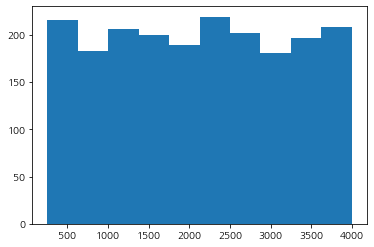

In [110]:
plt.hist(dataset['ram'])

(array([193., 216., 235., 204., 105., 202., 201., 231., 198., 215.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ]),
 <BarContainer object of 10 artists>)

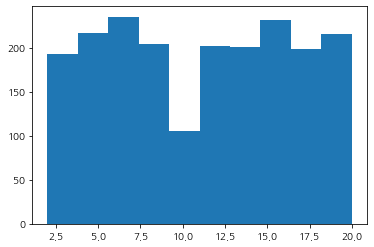

In [111]:
plt.hist(dataset['talk_time'])

In [134]:
y_train = dataset['price_range']
x_train = dataset.iloc[:, :20] 

In [135]:
y_train

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [136]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [138]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_train_scaled, y_train, test_size=0.33)

In [140]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1340, 20), (660, 20), (1340,), (660,))

In [144]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class="ovr")
logreg_softmax = LogisticRegression(multi_class="multinomial", solver="sag")

logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='sag')

In [145]:
y_pred = logreg_ovr.predict(X_val)
y_true = y_val

In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[166,   3,   0,   0],
       [ 16, 108,  32,   0],
       [  0,  40, 116,  14],
       [  0,   0,   2, 163]])

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       169
           1       0.72      0.69      0.70       156
           2       0.77      0.68      0.72       170
           3       0.92      0.99      0.95       165

    accuracy                           0.84       660
   macro avg       0.83      0.84      0.83       660
weighted avg       0.83      0.84      0.83       660



In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8378787878787879

In [150]:
y_pred = logreg_softmax.predict(X_val)
y_true = y_val
accuracy_score(y_true, y_pred)

0.953030303030303

In [151]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average="macro")

0.9524043076079275

In [153]:
from sklearn.model_selection import cross_val_score

cross_vbal_score(logreg_ovr, X_train, y_train, scoring="accuracy", cv=20, n_jobs=8).mean()

0.8283582089552238

In [154]:
cross_val_score(logreg_softmax, X_train, y_train, scoring="accuracy", cv=20, n_jobs=8).mean()

0.9597014925373134

In [164]:
binary_feature = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
X_to_scale = dataset.drop(binary_feature, axis=1)

In [165]:
X_to_scale

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [166]:
y_train = X_to_scale['price_range']
x_train = X_to_scale.iloc[:, :20] 

In [167]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_train_scaled, y_train, test_size=0.33)

In [169]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class="ovr")
logreg_softmax = LogisticRegression(multi_class="multinomial", solver="sag")

logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='sag')

In [170]:
y_pred = logreg_ovr.predict(X_val)
y_true = y_val

In [171]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[169,   0,   0,   0],
       [  0, 126,  23,   0],
       [  0,  30, 146,   0],
       [  0,   0,   0, 166]])

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       0.81      0.85      0.83       149
           2       0.86      0.83      0.85       176
           3       1.00      1.00      1.00       166

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660



In [173]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9196969696969697

In [174]:
y_pred = logreg_softmax.predict(X_val)
y_true = y_val
accuracy_score(y_true, y_pred)

1.0

In [175]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average="macro")

1.0

In [177]:
from sklearn.model_selection import cross_val_score

cross_val_score(logreg_ovr, X_train, y_train, scoring="accuracy", cv=20, n_jobs=8).mean()

0.9283582089552238

In [178]:
cross_val_score(logreg_softmax, X_train, y_train, scoring="accuracy", cv=20, n_jobs=8).mean()

1.0